In [36]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading train/test data

In [37]:
with open('basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)

with open('basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

# calculating "k" by cross validation

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] //2
k_list = []
for i in range(3, max_k_range, 1):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [39]:
# 10-fold cv
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv = 10, scoring = 'accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.875,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.8375,
 0.8375,
 0.825,
 0.825,
 0.8125,
 0.8125,
 0.8]

In [56]:
print("train.shape[0] size: ", train.shape[0])
print("train.shape[0] size divided by 2: ", train.shape[0] //2)
print("max_k_range: ", max_k_range)
print("Number of k's: ", len(k_list))
print("Length of scores: ", len(scores))
print("Data Type of scores: ", type(scores))
print("Length of scores * k's: ", scores.size * len(k_list))
print("Length of cross_validation_scores (number of mean cv scores):", len(cross_validation_scores))

train.shape[0] size:  80
train.shape[0] size divided by 2:  40
max_k_range:  40
Number of k's:  37
Length of scores:  10
Data Type of scores:  <class 'numpy.ndarray'>
Length of scores * k's:  370
Length of cross_validation_scores (number of mean cv scores): 37


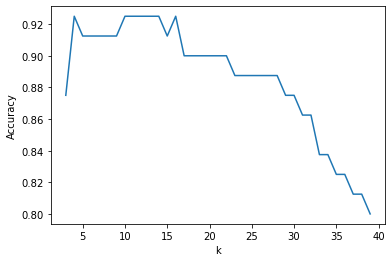

In [41]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [42]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k: " + str(k))

The best number of k: 4


# using two features only (3P, BLK)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data feature to be used for prediction
x_test = test[['3P', 'BLK']]

# select target value
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [44]:
# check ground truth with knn prediction
comparison = pd.DataFrame(
    {'prediction' : pred, 'ground_truth' : y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,C,C
3,C,C
4,SG,SG
5,C,C
6,C,C
7,C,C
8,SG,SG
9,SG,C


In [45]:
# check accuracy
print("accuracy is " + str (accuracy_score(y_test.values.ravel(), pred)))

accuracy is 0.95
